<a href="https://colab.research.google.com/github/santoshrsarangi/tensorflow/blob/main/computer-vision/2_Cats_vs_Dogs_Kaggle_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download your Kaggle API keys to local system and then upload to colab environment

In [ ]:
from google.colab import files
r = files.upload()

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
# Change access to your Kaggle API so only current account has access to read/write
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dogs-vs-cats

 98% 793M/812M [00:24<00:00, 45.4MB/s]
100% 812M/812M [00:24<00:00, 34.4MB/s]


In [6]:
!unzip --qq dogs-vs-cats.zip

In [7]:
!unzip --qq train.zip

In [8]:
!unzip --qq test1.zip

In [9]:
import os, shutil, pathlib

In [10]:
original_dir = pathlib.Path("train")
new_dir = pathlib.Path("cats_vs_dogs")

In [11]:
def create_folder_structure(name, start_index, end_index):

  for category in ("cat", "dog"):

    dir=new_dir / name / category
    os.makedirs(dir)

    file_names = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]

    for files in file_names:
      shutil.copyfile(src=original_dir / files, dst=dir / files)

In [12]:
create_folder_structure("train", start_index=0,end_index = 1000)
create_folder_structure("validation", start_index=1000, end_index=1500)
create_folder_structure("test", start_index=1500, end_index=2500 )

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
def getmodel():

  inputs = keras.Input(shape=(180, 180, 3))

  #rescale the image to 1 - 255
  x = layers.Rescaling(scale=1./255)(inputs)

  x = layers.Conv2D(filters=32, activation="relu", kernel_size=3) (x)
  x = layers.MaxPool2D(pool_size=(2,2))(x)

  x = layers.Conv2D(filters=64, activation="relu", kernel_size=3) (x)
  x = layers.MaxPool2D(pool_size=(2,2))(x)

  x = layers.Conv2D(filters=128, activation="relu", kernel_size=3) (x)
  x = layers.MaxPool2D(pool_size=(2,2))(x)

  x = layers.Conv2D(filters=256, activation="relu", kernel_size=3) (x)
  x = layers.MaxPool2D(pool_size=(2,2))(x)

  x = layers.Conv2D(filters=256, activation="relu", kernel_size=3) (x)
  
  x = layers.Flatten()(x)

  outputs = layers.Dense(1, activation="sigmoid")(x)

  model = keras.Model(inputs, outputs)

  model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics = ["accuracy"])
  
  return model

In [15]:
model = getmodel()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [16]:
from tensorflow.keras.utils import image_dataset_from_directory

In [17]:
train_dataset = image_dataset_from_directory(new_dir / "train", batch_size=32, image_size=(180, 180))

Found 2000 files belonging to 2 classes.


In [18]:
validation_dataset = image_dataset_from_directory(new_dir / "validation", batch_size=32, image_size=(180, 180))

Found 1000 files belonging to 2 classes.


In [19]:
test_dataset = image_dataset_from_directory(new_dir / "test", batch_size=32, image_size=(180, 180))

Found 2000 files belonging to 2 classes.


In [23]:
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="cats-vs-dogs.keras", monitor='val_loss', save_best_only=True)
]

In [26]:
model = getmodel()

In [27]:
history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=30,
                    batch_size=32,
                    callbacks = callbacks
                    )

Epoch 1/30
63/63 [==============================] - 6s 80ms/step - loss: 0.7129 - accuracy: 0.5405 - val_loss: 0.6887 - val_accuracy: 0.5110
Epoch 2/30
63/63 [==============================] - 5s 72ms/step - loss: 0.6872 - accuracy: 0.5860 - val_loss: 0.6543 - val_accuracy: 0.6190
Epoch 3/30
63/63 [==============================] - 5s 81ms/step - loss: 0.6813 - accuracy: 0.6425 - val_loss: 0.6221 - val_accuracy: 0.6330
Epoch 4/30
63/63 [==============================] - 5s 78ms/step - loss: 0.6138 - accuracy: 0.6790 - val_loss: 0.6203 - val_accuracy: 0.6490
Epoch 5/30
63/63 [==============================] - 5s 70ms/step - loss: 0.5890 - accuracy: 0.7035 - val_loss: 0.5684 - val_accuracy: 0.6900
Epoch 6/30
63/63 [==============================] - 5s 69ms/step - loss: 0.5530 - accuracy: 0.7205 - val_loss: 0.5614 - val_accuracy: 0.7030
Epoch 7/30
63/63 [==============================] - 6s 99ms/step - loss: 0.5095 - accuracy: 0.7425 - val_loss: 0.5828 - val_accuracy: 0.7160
Epoch 8/30
63

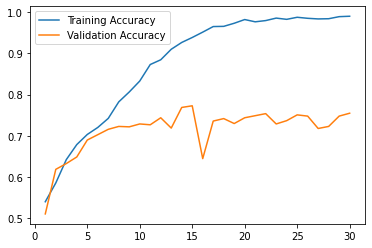

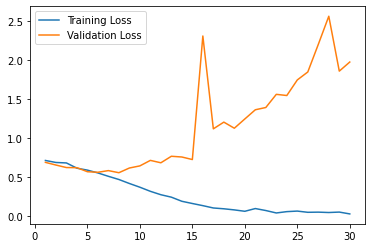

In [28]:
import matplotlib.pyplot as plt

epochs = len(history.history["val_loss"])

plt.plot(range(1, epochs+1), history.history["accuracy"], label="Training Accuracy")
plt.plot(range(1, epochs+1), history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()

plt.figure()
plt.plot(range(1, epochs+1), history.history["loss"], label="Training Loss")
plt.plot(range(1, epochs+1), history.history["val_loss"], label="Validation Loss")
plt.legend()

plt.show()

In [29]:
model = keras.models.load_model("cats-vs-dogs.keras")
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Testing loss was : {test_loss: .2f}")
print(f"Testing accuracy was : {test_accuracy: .2f}")

63/63 [==============================] - 3s 39ms/step - loss: 0.6036 - accuracy: 0.7005
Testing loss was :  0.60
Testing accuracy was :  0.70
